Размер датасета: (11017, 35)


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,31.347091



Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  Deb

None


Статистики для RiskScore:
Минимум: -9999999.00
Максимум: 10000000.00
Среднее: -25698.78
Медиана: 44.12
Стандартное отклонение: 1431674.59


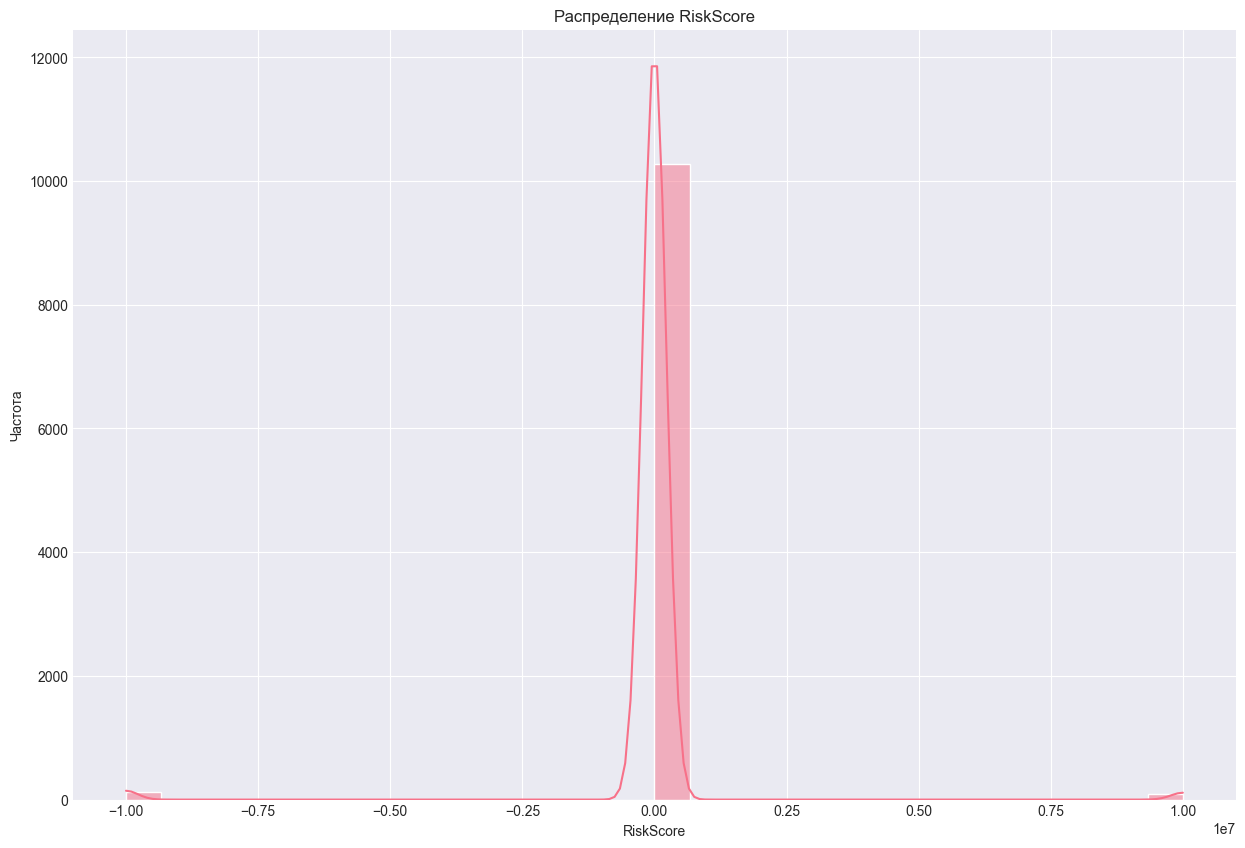

Исходное количество строк: 11017.
Количество строк после очистки: 10272.

Статистики для RiskScore:
Минимум: 14.84
Максимум: 97.60
Среднее: 48.36
Медиана: 44.20
Стандартное отклонение: 17.24


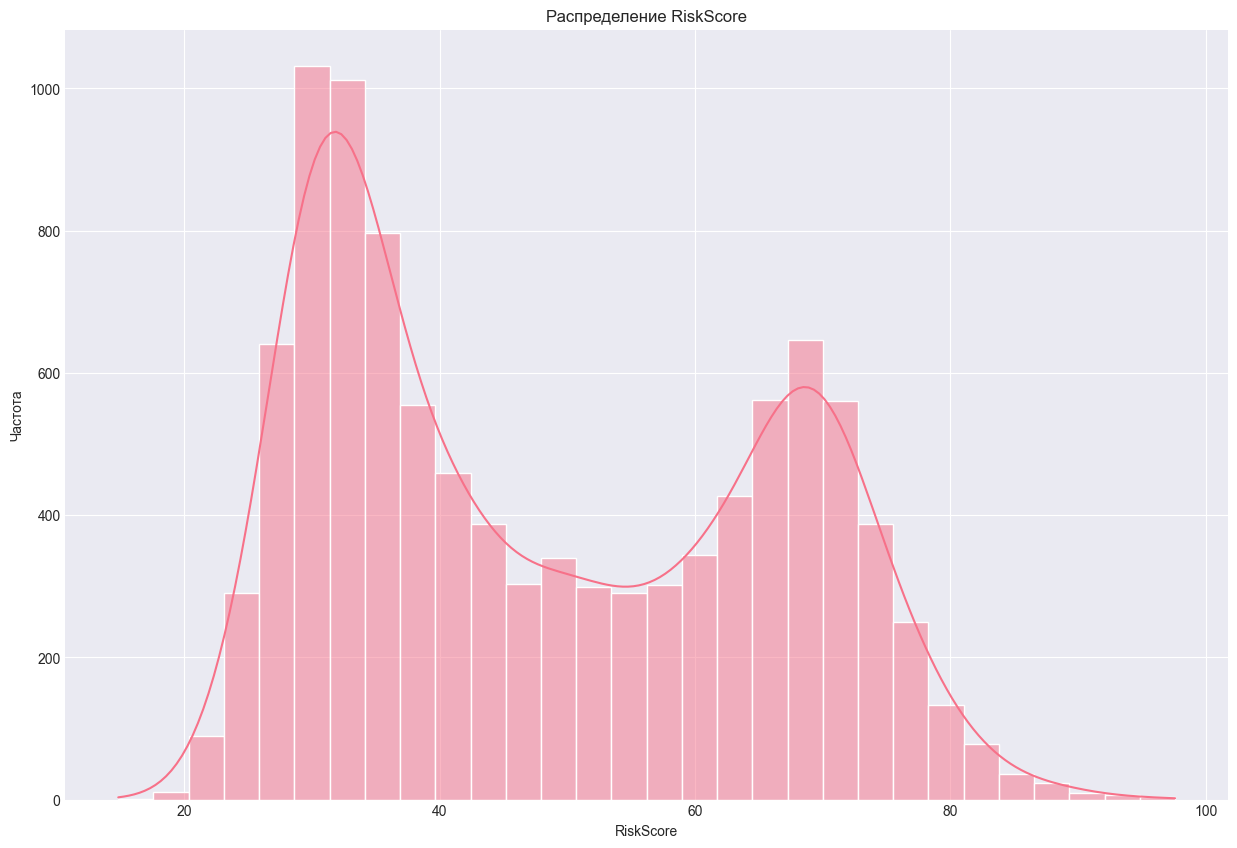

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

train_df = pd.read_csv('train.csv')
print("Размер датасета:", train_df.shape)
display(train_df.head())

print("\nИнформация о типах данных:")
display(train_df.info())



print(f"\nСтатистики для RiskScore:")
print(f"Минимум: {train_df['RiskScore'].min():.2f}")
print(f"Максимум: {train_df['RiskScore'].max():.2f}")
print(f"Среднее: {train_df['RiskScore'].mean():.2f}")
print(f"Медиана: {train_df['RiskScore'].median():.2f}")
print(f"Стандартное отклонение: {train_df['RiskScore'].std():.2f}")

plt.figure(figsize=(15, 10))
sns.histplot(train_df['RiskScore'], kde=True, bins=30)

plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


df_cleaned  = train_df[(train_df['RiskScore'] > -9999999) & (train_df['RiskScore'] < 1000000)].copy()


original_rows = len(train_df)
cleaned_rows = len(df_cleaned)
print(f"Исходное количество строк: {original_rows}.")
print(f"Количество строк после очистки: {cleaned_rows}.")

print(f"\nСтатистики для RiskScore:")
print(f"Минимум: {df_cleaned['RiskScore'].min():.2f}")
print(f"Максимум: {df_cleaned['RiskScore'].max():.2f}")
print(f"Среднее: {df_cleaned['RiskScore'].mean():.2f}")
print(f"Медиана: {df_cleaned['RiskScore'].median():.2f}")
print(f"Стандартное отклонение: {df_cleaned['RiskScore'].std():.2f}")

plt.figure(figsize=(15, 10))
sns.histplot(df_cleaned['RiskScore'], kde=True, bins=30)

plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


ГРАФИКИ ЗАВИСИМОСТИ RISKSCORE ОТ ПРИЗНАКОВ


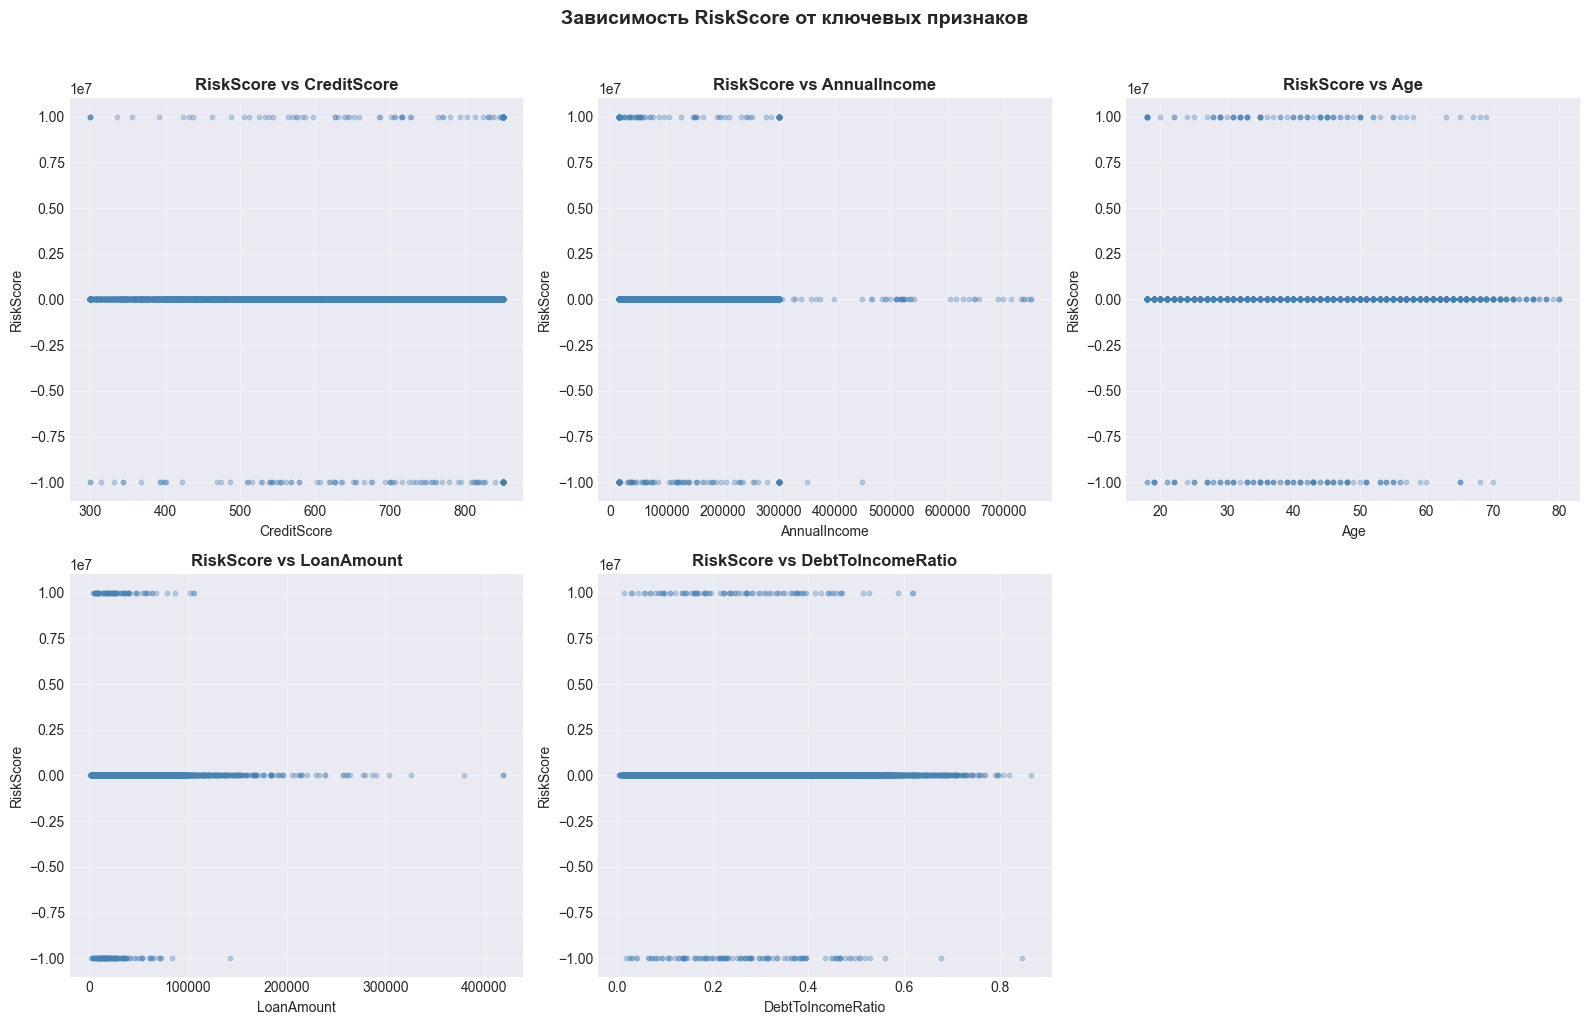


КОРРЕЛЯЦИЯ ВЫБРАННЫХ ПРИЗНАКОВ С RISKSCORE

Корреляция признаков с RiskScore:


RiskScore            1.000000
LoanAmount           0.011771
CreditScore          0.002383
Age                 -0.004648
DebtToIncomeRatio   -0.007417
AnnualIncome        -0.008460
Name: RiskScore, dtype: float64

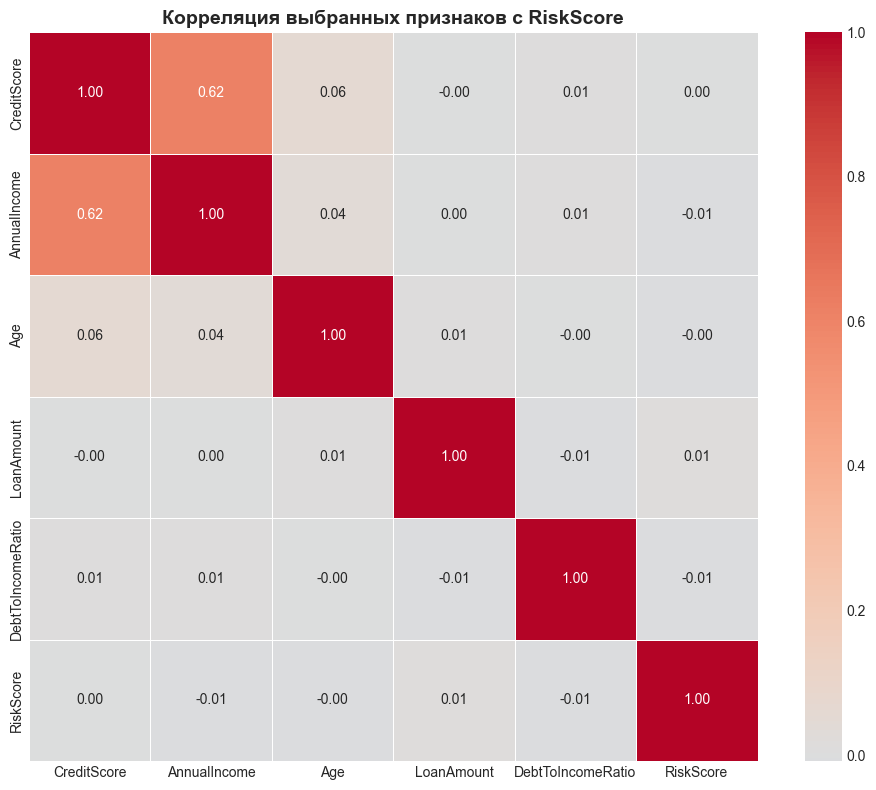

Топ-10 признаков по корреляции с RiskScore (положительные):


RiskScore                    1.000000
PaymentHistory               0.019144
TotalDebtToIncomeRatio       0.013879
MonthlyLoanPayment           0.012366
LoanAmount                   0.011771
NumberOfCreditInquiries      0.011055
NetWorth                     0.008804
TotalAssets                  0.008092
SavingsAccountBalance        0.007611
CreditCardUtilizationRate    0.005501
BankruptcyHistory            0.005184
Name: RiskScore, dtype: float64


Топ-10 признаков по корреляции с RiskScore (отрицательные):


Age                          -0.004648
TotalLiabilities             -0.004976
Experience                   -0.005408
PreviousLoanDefaults         -0.005409
MonthlyIncome                -0.006145
DebtToIncomeRatio            -0.007417
AnnualIncome                 -0.008460
LengthOfCreditHistory        -0.009448
UtilityBillsPaymentHistory   -0.013865
NumberOfDependents           -0.023314
Name: RiskScore, dtype: float64

Топ-10 признаков по корреляции с RiskScore (положительные) Очищенные:


RiskScore                    1.000000
BaseInterestRate             0.758712
InterestRate                 0.742634
TotalDebtToIncomeRatio       0.530729
BankruptcyHistory            0.177559
MonthlyLoanPayment           0.150830
DebtToIncomeRatio            0.110862
LoanAmount                   0.084978
CreditCardUtilizationRate    0.056063
PreviousLoanDefaults         0.054959
LoanDuration                 0.028269
Name: RiskScore, dtype: float64


Топ-10 признаков по корреляции с RiskScore (отрицательные) Очищенные:


CheckingAccountBalance    -0.004531
NumberOfCreditInquiries   -0.016380
Age                       -0.044272
Experience                -0.046795
LengthOfCreditHistory     -0.061454
NetWorth                  -0.144574
TotalAssets               -0.145735
AnnualIncome              -0.758514
MonthlyIncome             -0.770267
CreditScore               -0.785425
Name: RiskScore, dtype: float64

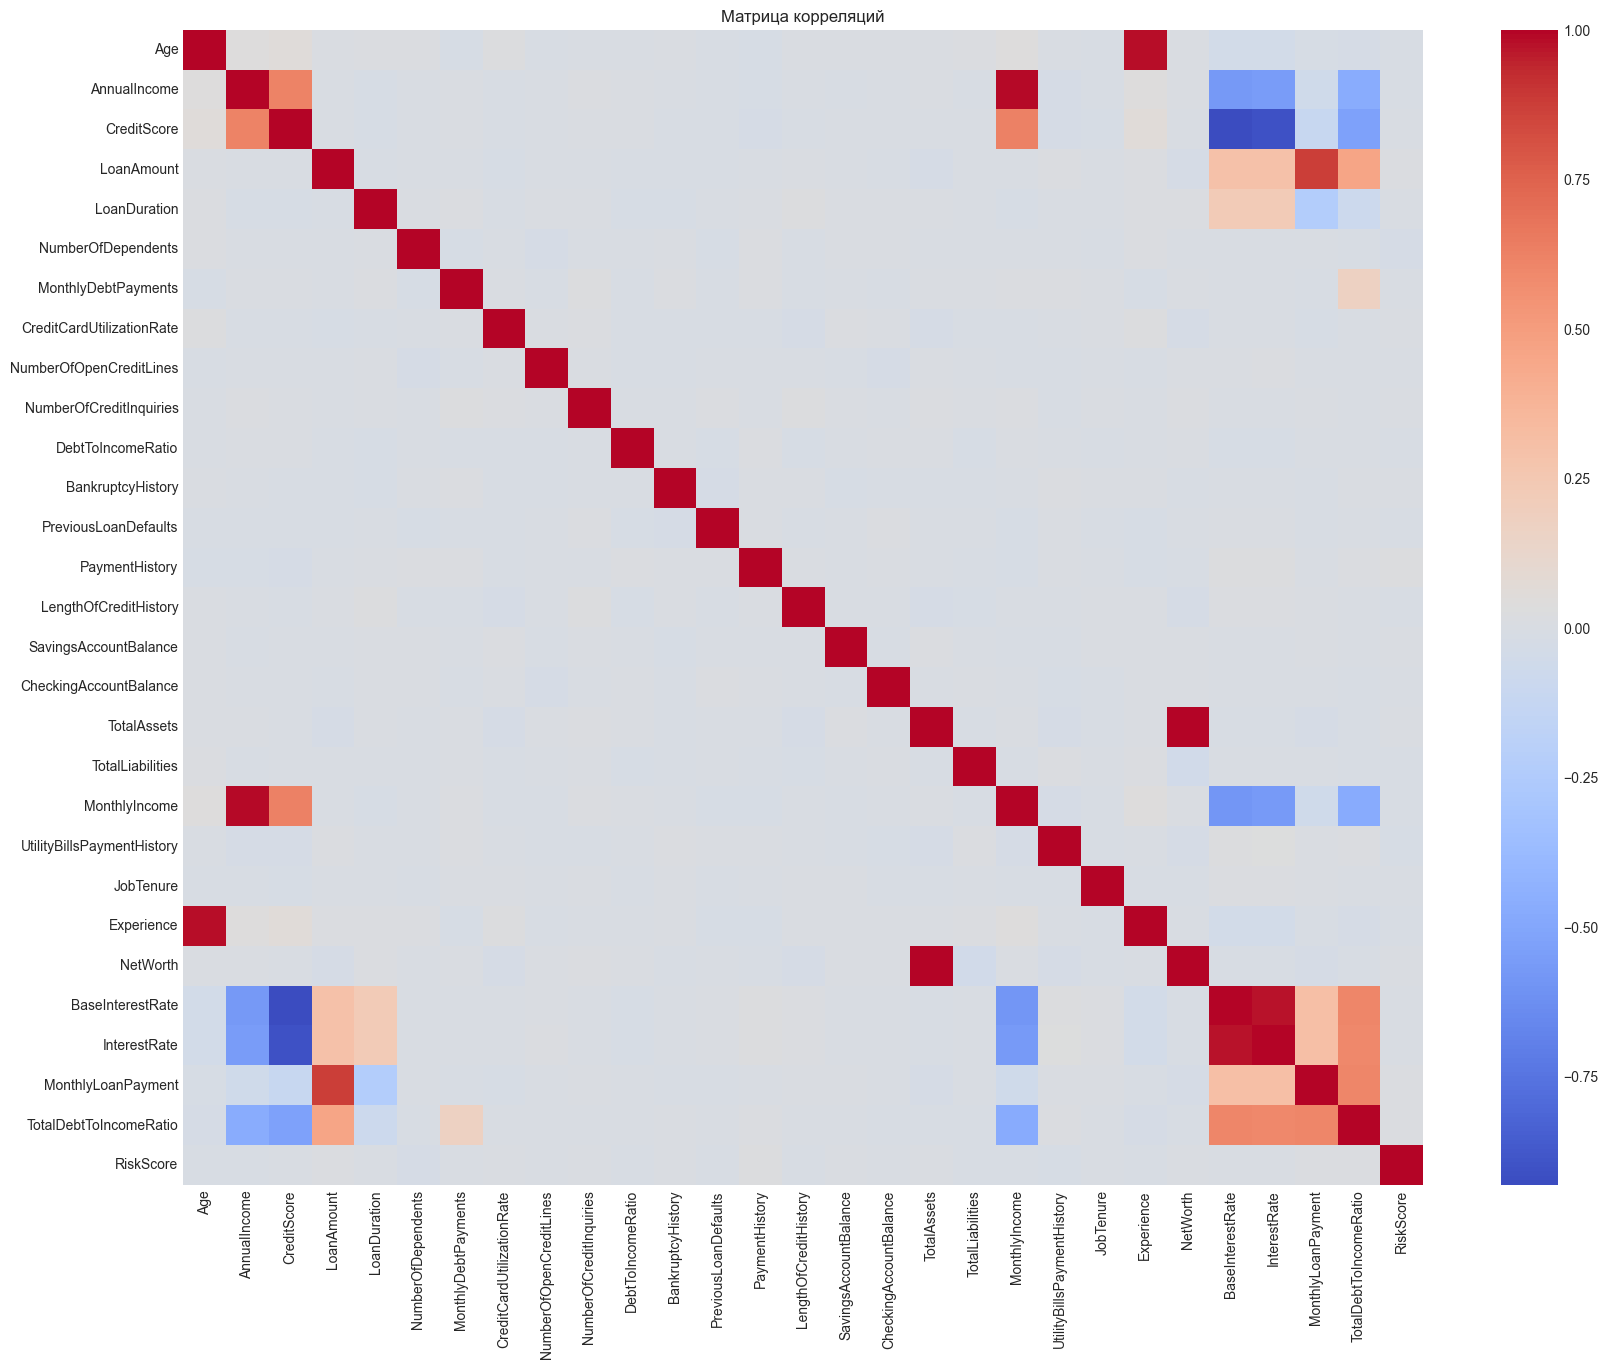

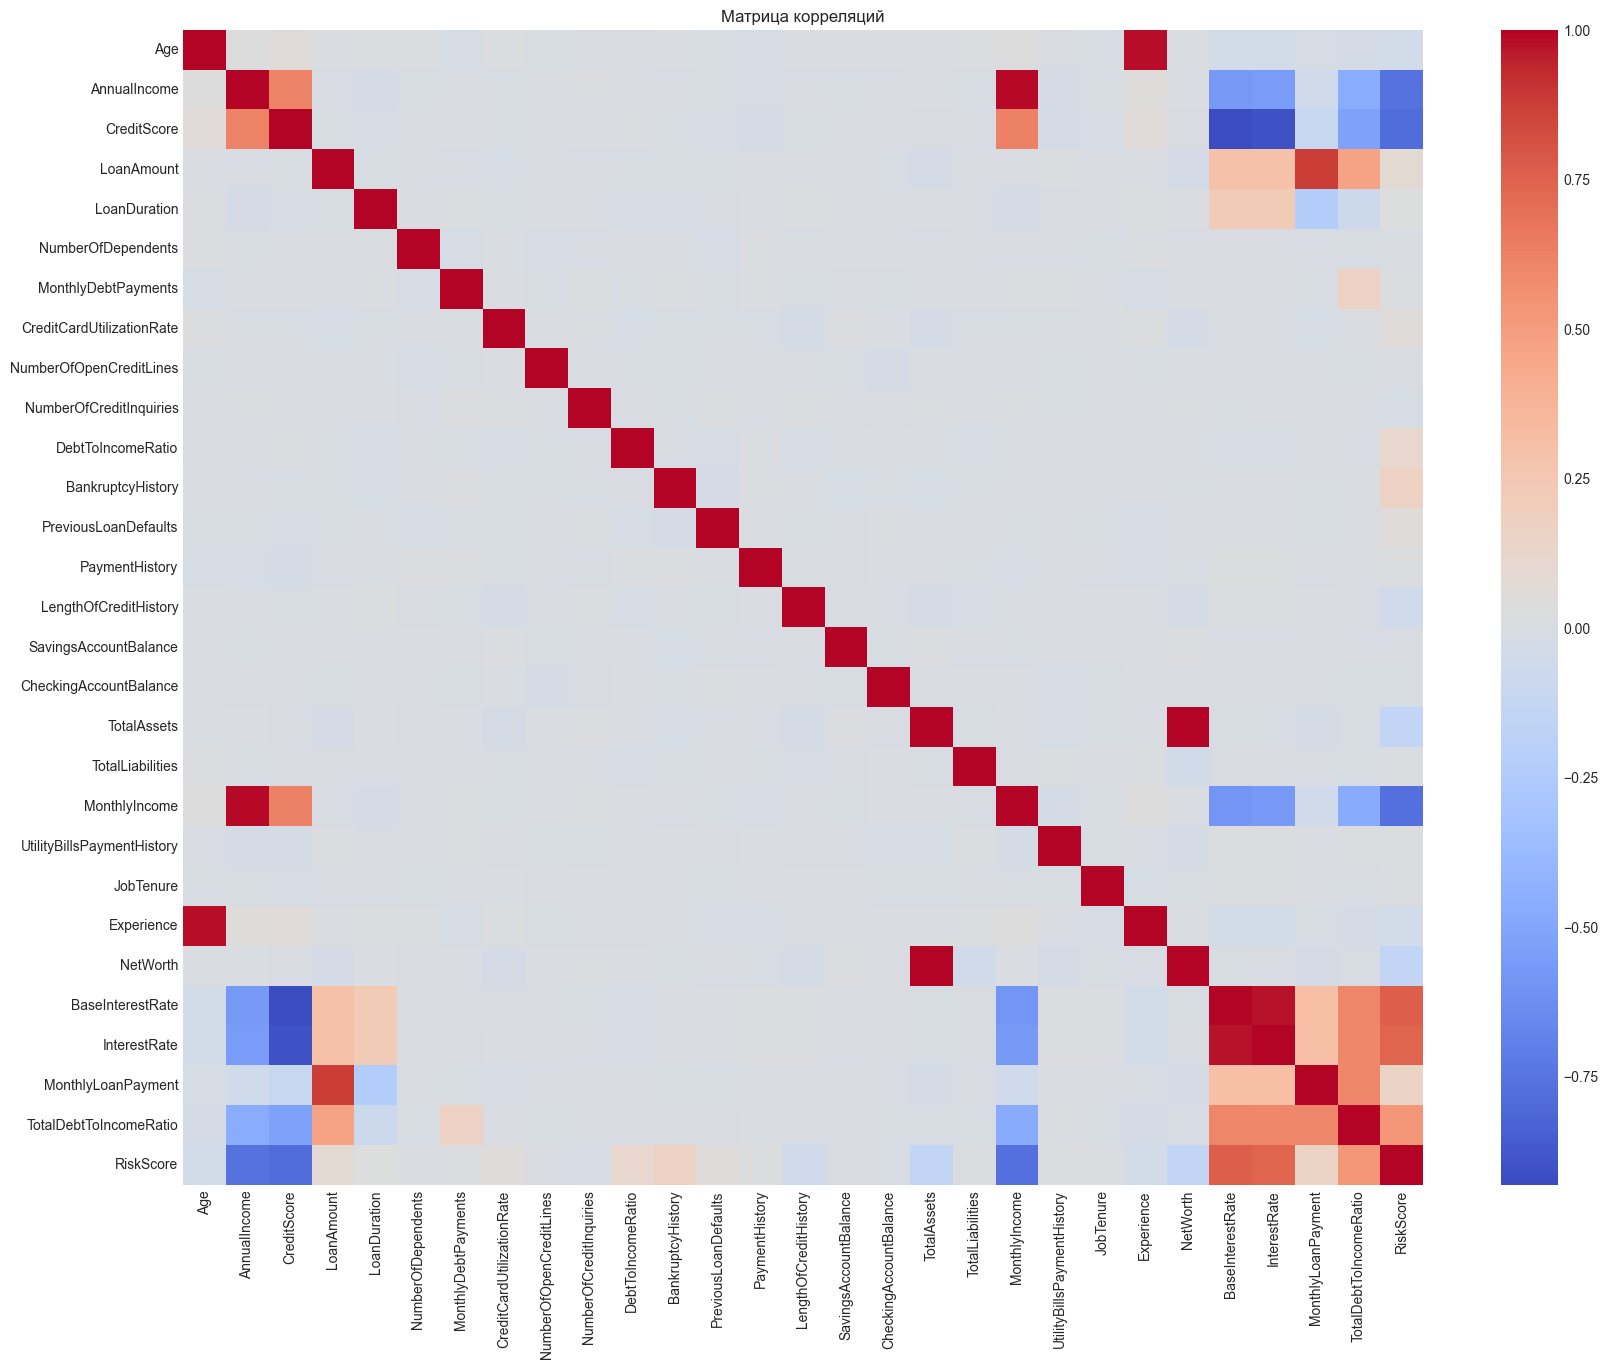

In [43]:
selected_features = ['CreditScore', 'AnnualIncome', 'Age', 'LoanAmount', 'DebtToIncomeRatio']

print("\n" + "="*50)
print("ГРАФИКИ ЗАВИСИМОСТИ RISKSCORE ОТ ПРИЗНАКОВ")
print("="*50)


fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

fig.delaxes(axes[5])

for i, feature in enumerate(selected_features):
    ax = axes[i]
    ax.scatter(train_df[feature], train_df['RiskScore'], 
               alpha=0.3, s=10, color='steelblue')
    ax.set_title(f'RiskScore vs {feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('RiskScore')
    ax.grid(True, alpha=0.3)


plt.suptitle('Зависимость RiskScore от ключевых признаков', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("КОРРЕЛЯЦИЯ ВЫБРАННЫХ ПРИЗНАКОВ С RISKSCORE")
print("="*50)

corr_features = selected_features + ['RiskScore']
corr_matrix = train_df[corr_features].corr()

print("\nКорреляция признаков с RiskScore:")
display(corr_matrix['RiskScore'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            fmt='.2f')
plt.title('Корреляция выбранных признаков с RiskScore', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


print("Топ-10 признаков по корреляции с RiskScore (положительные):")
cor_numer = train_df.select_dtypes(include=np.number).corr()['RiskScore'].sort_values(ascending=False)
display(cor_numer.head(11)) 
print("\nТоп-10 признаков по корреляции с RiskScore (отрицательные):")
display(cor_numer.tail(10))       

print("Топ-10 признаков по корреляции с RiskScore (положительные) Очищенные:")
cor_numer = df_cleaned.select_dtypes(include=np.number).corr()['RiskScore'].sort_values(ascending=False)
display(cor_numer.head(11)) 

print("\nТоп-10 признаков по корреляции с RiskScore (отрицательные) Очищенные:")
display(cor_numer.tail(10))        

only_numerical_columns = train_df.select_dtypes(include=np.number)
correlation_matrix = only_numerical_columns.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()


only_numerical_columns = df_cleaned.select_dtypes(include=np.number)
correlation_matrix = only_numerical_columns.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

In [44]:
from IPython.display import display
import pandas as pd
import numpy as np

def z_score_normalize(df):
    mean = np.mean(df, axis=0)
    std = np.std(df, axis=0)
    epsilon = 1e-10
    return (df - mean) / (std + epsilon)


def min_max_normalize(df):
      min_val = np.min(df, axis=0)
      max_val = np.max(df, axis=0)
      epsilon = 1e-10
      return (df - min_val) / (max_val - min_val + epsilon)

df_imputed = df_cleaned.copy()

numeric_cols = df_imputed.select_dtypes(include=np.number).columns
for col in numeric_cols:
    median_val = df_imputed[col].median()
    df_imputed[col] = df_imputed[col].fillna(median_val)


numeric_features = df_imputed.select_dtypes(include=np.number)
if 'RiskScore' in numeric_features.columns:
    numeric_features = numeric_features.drop('RiskScore', axis=1)
numeric_feature_names = numeric_features.columns

df_numeric_imputed = df_imputed[numeric_feature_names]

df_z_scaled = pd.DataFrame(z_score_normalize(df_numeric_imputed.values), columns=numeric_feature_names)
df_min_max_scaled = pd.DataFrame(min_max_normalize(df_numeric_imputed.values), columns=numeric_feature_names)

print("Результат Z-score нормализации:")
display(df_z_scaled.head())
display(df_z_scaled.describe().loc[['mean', 'std']])

print("Результат Min-max нормализации:")
display(df_min_max_scaled.head())
display(df_min_max_scaled.describe().loc[['min', 'max']])



Результат Z-score нормализации:


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,-1.108451,-0.558650,-0.764119,-0.450467,0.268131,-0.400573,1.130185,-0.831696,-0.591929,0.022255,...,-0.263579,-0.560983,1.005394,-0.432306,-1.203829,-0.249562,0.629564,0.530862,-0.421499,-0.256612
1,1.304533,0.350659,0.991696,-0.493848,-0.710632,-0.400573,-0.668116,-0.682975,-0.016743,-0.989281,...,-0.019743,0.373890,0.103462,-1.340227,1.355815,-0.267441,-1.228873,-1.108086,-0.417278,-0.520888
2,0.959821,1.454535,0.991696,0.326929,-0.710632,-1.105987,0.013367,1.003963,-0.016743,-0.989281,...,-0.268894,1.508799,1.067638,-0.886267,0.914497,0.289764,-0.987194,-0.877497,0.140186,-0.496417
3,-1.280807,-0.836197,0.974196,-0.380764,-0.221251,-1.105987,-0.786104,-0.602935,2.284003,-0.989281,...,-0.318138,-0.846332,0.746299,-0.886267,-1.556883,-0.306845,-1.071088,-0.904643,-0.429240,-0.326289
4,1.304533,1.454535,0.991696,0.032859,-0.221251,0.304842,0.045915,-0.069843,-0.016743,0.022255,...,1.382131,1.508799,0.846062,0.021655,1.179288,-0.317311,-0.965533,-1.150906,-0.238737,-0.518511


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
mean,1.570222e-16,-6.087204e-17,-4.842094e-17,3.095482e-17,-7.885696e-17,-5.672167e-17,7.470660e-17,6.363895e-17,-6.778932e-17,1.590974e-17,...,1.798492e-17,-7.193969e-17,-4.012021e-17,-1.552929e-16,3.977435e-17,2.075183e-18,-2.490220e-16,1.839996e-16,-8.162387e-17,8.300733e-18
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,...,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00


Результат Min-max нормализации:


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,0.145161,0.070659,0.452727,0.038827,0.444444,0.166667,0.099577,0.162808,0.166667,0.166667,...,0.001659,0.181856,0.880256,0.235294,0.070175,0.003025,0.306411,0.260441,0.016179,0.011566
1,0.596774,0.214240,1.000000,0.036003,0.222222,0.166667,0.018222,0.188832,0.250000,0.000000,...,0.007202,0.551393,0.729769,0.117647,0.578947,0.002309,0.050173,0.059359,0.016371,0.001826
2,0.532258,0.388544,1.000000,0.089423,0.222222,0.000000,0.049052,0.484029,0.250000,0.000000,...,0.001538,1.000000,0.890641,0.176471,0.491228,0.024634,0.083495,0.087650,0.041827,0.002728
3,0.112903,0.026834,0.994545,0.043363,0.333333,0.000000,0.012884,0.202839,0.583333,0.000000,...,0.000419,0.069063,0.837026,0.176471,0.000000,0.000730,0.071928,0.084320,0.015825,0.008998
4,0.596774,0.388544,1.000000,0.070284,0.333333,0.333333,0.050525,0.296124,0.250000,0.166667,...,0.039071,1.000000,0.853671,0.294118,0.543860,0.000311,0.086482,0.054106,0.024524,0.001914


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [45]:
from IPython.display import display
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
import time
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')

X = df_z_scaled.to_numpy()
y = df_imputed['RiskScore'].to_numpy()
X_b = np.c_[np.ones((X.shape[0], 1)), X]

display(df_z_scaled)

train_numeric_features = [col for col in df_z_scaled]

print(train_numeric_features)

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,-1.108451,-0.558650,-0.764119,-0.450467,0.268131,-0.400573,1.130185,-0.831696,-0.591929,0.022255,...,-0.263579,-0.560983,1.005394,-0.432306,-1.203829,-0.249562,0.629564,0.530862,-0.421499,-0.256612
1,1.304533,0.350659,0.991696,-0.493848,-0.710632,-0.400573,-0.668116,-0.682975,-0.016743,-0.989281,...,-0.019743,0.373890,0.103462,-1.340227,1.355815,-0.267441,-1.228873,-1.108086,-0.417278,-0.520888
2,0.959821,1.454535,0.991696,0.326929,-0.710632,-1.105987,0.013367,1.003963,-0.016743,-0.989281,...,-0.268894,1.508799,1.067638,-0.886267,0.914497,0.289764,-0.987194,-0.877497,0.140186,-0.496417
3,-1.280807,-0.836197,0.974196,-0.380764,-0.221251,-1.105987,-0.786104,-0.602935,2.284003,-0.989281,...,-0.318138,-0.846332,0.746299,-0.886267,-1.556883,-0.306845,-1.071088,-0.904643,-0.429240,-0.326289
4,1.304533,1.454535,0.991696,0.032859,-0.221251,0.304842,0.045915,-0.069843,-0.016743,0.022255,...,1.382131,1.508799,0.846062,0.021655,1.179288,-0.317311,-0.965533,-1.150906,-0.238737,-0.518511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,-0.074315,1.454535,0.991696,-0.802255,0.757512,2.421084,-0.535888,-0.435536,-0.591929,0.022255,...,-0.113621,1.508799,0.759157,-1.340227,-0.144666,-0.286047,-0.994934,-0.948396,-0.689699,-0.558387
10268,1.476889,1.454535,0.991696,-0.543625,-0.221251,0.304842,0.163903,1.211837,-1.167115,2.045329,...,-0.333613,1.508799,0.013270,-0.432306,1.797133,0.044083,-1.135280,-0.971269,-0.517796,-0.532725
10269,-1.022273,-1.006139,-2.216604,0.802094,1.736274,-0.400573,0.318508,0.238311,-0.591929,-0.989281,...,-0.328396,-1.021052,-0.377507,-0.886267,-1.115565,-0.068220,2.670846,2.080039,0.528373,1.639212
10270,-1.453163,-1.006139,-2.204937,0.043410,0.757512,1.010256,-0.257192,1.333035,-0.591929,-0.989281,...,-0.319219,-1.021052,-0.184199,-0.886267,-1.556883,0.228577,2.220125,1.661568,-0.023003,0.723484


['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio']


In [46]:

print(f"Размер матрицы признаков X: {X_b.shape}")
print(f"Размер вектора цели y: {y.shape}")

class MyLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.weights = None
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.loss_history = []  
        self._is_fitted = False

    def fit(self, X, y, method='analytical'):
        if method == 'analytical':
            self._fit_analytical(X, y)
        elif method == 'gd':
            self._fit_gd(X, y)
        elif method == 'sgd':
            self._fit_sgd(X, y)
        else:
            raise ValueError("Используй 'analytical', 'gd' или 'sgd'.")
        
        self._is_fitted = True
        return self

    def _fit_analytical(self, X, y):
        try:
            self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
        except np.linalg.LinAlgError:
            print("Матрица (X^T * X) вырожденная")
    
        predictions = X @ self.weights
        mse = np.mean((y - predictions) ** 2)
        self.loss_history = [mse]

    def _fit_gd(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        
        for iteration in range(self.n_iterations):

            predictions = X @ self.weights
 
            errors = predictions - y

            gradient = (2 / n_samples) * X.T @ errors

            self.weights -= self.learning_rate * gradient

            mse = np.mean(errors ** 2)
            self.loss_history.append(mse)

            

    def _fit_sgd(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        for epoch in range(self.n_iterations):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            
            for i in range(n_samples):
                idx = indices[i]
                xi = X[idx:idx+1] 
                yi = y[idx:idx+1] 

                prediction = xi @ self.weights

                error = prediction - yi

                gradient = 2 * xi.T @ error
   
                self.weights -= self.learning_rate * gradient

            predictions = X @ self.weights
            mse = np.mean((y - predictions) ** 2)
            self.loss_history.append(mse)

            if epoch > 0 and abs(self.loss_history[-2] - self.loss_history[-1]) < 1e-6:
                print(f"SGD сошелся за {epoch} эпох")
                break
    
    def predict(self, X):
        if not self._is_fitted:
            raise RuntimeError("Модель не обучена. Сначала вызови fit().")
        
        return X @ self.weights

    def get_params(self):
        return {
            'weights': self.weights,
            'loss_history': self.loss_history,
            'learning_rate': self.learning_rate,
            'n_iterations': self.n_iterations
        }

print("Аналитический метод")
model_analytical = MyLinearRegression()
start_time = time.time()
model_analytical.fit(X_b, y, method='analytical')
time_analytical = time.time() - start_time

print(f"Время обучения: {time_analytical:.4f} секунд")


print("Градиентный спуск")
model_gd = MyLinearRegression(
    learning_rate=0.01, 
    n_iterations=4000
)
start_time = time.time()
model_gd.fit(X_b, y, method='gd')
time_gd = time.time() - start_time

print(f"Время обучения: {time_gd:.4f} секунд")


print("Стохастический градиентный спуск")
model_sgd = MyLinearRegression(
    learning_rate=0.001,
    n_iterations=400
)
start_time = time.time()
model_sgd.fit(X_b, y, method='sgd')
time_sgd = time.time() - start_time

print(f"Время обучения: {time_sgd:.4f} секунд")


print("модель из Scikit-learn")
model_sklearn = SklearnLinearRegression(fit_intercept=False)
start_time = time.time()
model_sklearn.fit(X_b, y)
time_sklearn = time.time() - start_time

print(f"Время обучения: {time_sklearn:.4f} секунд")

print(" Сравнение весов моделей")
comparison_df = pd.DataFrame({
    'Analytical': model_analytical.weights,
    'GradientDescent': model_gd.weights,
    'StochasticGD': model_sgd.weights,
    'Sklearn': model_sklearn.coef_
})
feature_names = ['Intercept'] + list(df_z_scaled.columns)
comparison_df.index = feature_names

display(comparison_df.head())

Размер матрицы признаков X: (10272, 29)
Размер вектора цели y: (10272,)
Аналитический метод
Время обучения: 0.0020 секунд
Градиентный спуск
Время обучения: 0.9722 секунд
Стохастический градиентный спуск
Время обучения: 54.7774 секунд
модель из Scikit-learn
Время обучения: 0.0569 секунд
 Сравнение весов моделей


,Analytical,GradientDescent,StochasticGD,Sklearn
Intercept,48.358094,48.358094,48.061053,48.358094
Age,0.089214,0.080038,-0.230679,0.089214
AnnualIncome,0.157996,-1.121371,0.261764,0.157996
CreditScore,-2.393959,-2.170983,-2.733598,-2.393959
LoanAmount,-0.196476,-0.269241,-0.421581,-0.196476


In [47]:
def kfold_cross_validation(model, X, y, k=5, random_state=None):
    n_samples = len(y)
    indices = np.arange(n_samples)
    
    if random_state is not None:
        np.random.seed(random_state)
    np.random.shuffle(indices)
    
    fold_size = n_samples // k
    mse_scores = []
    
    for fold in range(k):
       
        start_idx = fold * fold_size
        end_idx = (fold + 1) * fold_size if fold < k - 1 else n_samples
        
        test_indices = indices[start_idx:end_idx]
        train_indices = np.concatenate([indices[:start_idx], indices[end_idx:]])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
  
        model_copy = MyLinearRegression(
            learning_rate=model.learning_rate,
            n_iterations=model.n_iterations
        )
        model_copy.fit(X_train, y_train)
        
        y_pred = model_copy.predict(X_test)
        
        mse = np.mean((y_test - y_pred) ** 2)
        mse_scores.append(mse)
        
        print(f"Fold {fold}: MSE: {mse}")
    
    return mse_scores


def leave_one_out_cross_validation(model, X, y, max_samples=None):
    n_samples = len(y)
    
    if max_samples is not None and max_samples < n_samples:
        n_iterations = max_samples
    else:
        n_iterations = n_samples
    
    mse_scores = []
    
    for i in range(n_iterations):
       
        test_idx = i
        train_indices = np.arange(n_samples)
        train_indices = np.delete(train_indices, test_idx)
     
        X_train, X_test = X[train_indices], X[test_idx:test_idx+1]
        y_train, y_test = y[train_indices], y[test_idx:test_idx+1]
        
        
        model_copy = MyLinearRegression(
            learning_rate=model.learning_rate,
            n_iterations=model.n_iterations
        )
        model_copy.fit(X_train, y_train)
        
        y_pred = model_copy.predict(X_test)
        
        mse = np.mean((y_test - y_pred) ** 2)
        mse_scores.append(mse)
        
        
    return mse_scores


model_for_kfold = MyLinearRegression()
kfold_scores = kfold_cross_validation(model_for_kfold, X_b, y)

X_x, y_y = X_b, y

model_for_loo = MyLinearRegression()
loo_scores = leave_one_out_cross_validation(model_for_loo, X_x, y_y)
print(f"Среднее mse {np.mean(loo_scores)} for loo")

Fold 0: MSE: 52.766531591807905
Fold 1: MSE: 53.93519285665463
Fold 2: MSE: 53.00471179905932
Fold 3: MSE: 55.27620917631
Fold 4: MSE: 52.761597928698286
Среднее mse 53.689594941967684 for loo


In [48]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

y_true = y
y_pred = model_analytical.predict(X_b)

def my_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def my_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def my_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def my_mape(y_true, y_pred):
    epsilon = 1e-8
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100


my_mse_val = my_mse(y_true, y_pred)
my_mae_val = my_mae(y_true, y_pred)
my_r2_val = my_r2(y_true, y_pred)
my_mape_val = my_mape(y_true, y_pred)

sklearn_mse_val = mean_squared_error(y_true, y_pred)
sklearn_mae_val = mean_absolute_error(y_true, y_pred)
sklearn_r2_val = r2_score(y_true, y_pred)
sklearn_mape_val = mean_absolute_percentage_error(y_true, y_pred) * 100

results_df = pd.DataFrame({
    'My': [my_mse_val, my_mae_val, my_r2_val, my_mape_val],
    'Sklearn': [sklearn_mse_val, sklearn_mae_val, sklearn_r2_val, sklearn_mape_val]
}, index=['MSE', 'MAE', 'R2', 'MAPE'])

display(results_df)

,My,Sklearn
MSE,53.196339,53.196339
MAE,5.843071,5.843071
R2,0.821032,0.821032
MAPE,13.714009,13.714009


In [58]:
test_df = pd.read_csv('test.csv')

display(test_df.head())
test_ids = test_df['ID'].copy()

numeric_cols = test_df.select_dtypes(include=np.number).columns

numeric_cols_to_fill = [col for col in numeric_cols if col != 'ID']

for col in numeric_cols_to_fill:  
    median_val = test_df[col].median()
    test_df[col] = test_df[col].fillna(median_val)

available_features = [col for col in train_numeric_features if col in test_df.columns]
missing_features = [col for col in train_numeric_features if col not in test_df.columns]

print(f"\nДоступно признаков: {len(available_features)} из {len(train_numeric_features)}")

if missing_features:
    print(f"Отсутствующие признаки: {missing_features}")
    print("Заполняем отсутствующие признаки нулями...")
    for feat in missing_features:
        test_df[feat] = 0
    available_features = train_numeric_features

X_test = test_df[available_features].copy()
X_test_normalized = z_score_normalize(X_test)
X_test_normalized = X_test_normalized.fillna(0)

display(X_test_normalized.head())
display(X_test_normalized.info())

X_test_array = X_test_normalized.to_numpy()
X_b_test = np.c_[np.ones((X_test_array.shape[0], 1)), X_test_array]

test_predictions = model_analytical.predict(X_b_test)

print(f"\n Сделано {len(test_predictions)} предсказаний")
print(f"Диапазон предсказаний: [{test_predictions.min():.2f}, {test_predictions.max():.2f}]")
print(f"Первые 5 предсказаний: {test_predictions[:5]}")

submission_df = pd.DataFrame({
    'ID': test_ids,
    'RiskScore': test_predictions
})

submission_file = 'submission.csv'
submission_df.to_csv(submission_file, index=False)

display(submission_df.head(10))

,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,...,0.883232,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,...,0.791928,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,...,0.805826,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,...,0.829294,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,...,0.735013,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707



Доступно признаков: 28 из 28


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,0.787875,0.638663,0.971893,-0.546054,0.267179,-1.071670,-0.336550,-1.300770,-0.556629,-0.998301,...,-0.275714,0.665486,0.801835,0.459492,0.478448,-0.345785,-1.005637,-0.765777,-0.535452,-0.510505
1,-1.009910,-0.596647,-0.025652,1.190827,-0.222878,0.328657,-0.612864,-1.320560,0.589170,1.001902,...,-0.326070,-0.598856,0.064060,-0.890632,-1.271544,0.381564,0.341413,0.610032,0.762163,-0.073543
2,0.103005,1.444370,0.507128,-0.465971,0.267179,-0.371507,-0.150339,0.298636,1.162069,-0.998301,...,-0.409819,1.490128,0.176356,-0.890632,0.128449,-0.354983,-0.553050,-0.468442,-0.481443,-0.516557
3,0.873484,1.444370,0.971893,0.620613,-0.712935,-1.071670,0.045884,1.639138,-0.556629,0.001800,...,0.194684,1.490128,0.365987,-0.890632,0.740947,-0.351303,-0.856570,-1.026646,0.322696,-0.463079
4,-0.410648,1.444370,-0.036987,0.728809,0.267179,3.129310,-0.877165,0.956348,-1.702428,-0.998301,...,-0.432463,1.490128,-0.395837,0.909534,-0.484048,0.727567,0.314531,0.377687,0.263987,-0.486155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         5000 non-null   float64
 1   AnnualIncome                5000 non-null   float64
 2   CreditScore                 5000 non-null   float64
 3   LoanAmount                  5000 non-null   float64
 4   LoanDuration                5000 non-null   float64
 5   NumberOfDependents          5000 non-null   float64
 6   MonthlyDebtPayments         5000 non-null   float64
 7   CreditCardUtilizationRate   5000 non-null   float64
 8   NumberOfOpenCreditLines     5000 non-null   float64
 9   NumberOfCreditInquiries     5000 non-null   float64
 10  DebtToIncomeRatio           5000 non-null   float64
 11  BankruptcyHistory           5000 non-null   float64
 12  PreviousLoanDefaults        5000 non-null   float64
 13  PaymentHistory              5000 

None


 Сделано 5000 предсказаний
Диапазон предсказаний: [-16.90, 105.05]
Первые 5 предсказаний: [37.01776857 54.19529691 29.76038448 30.56933318 36.70113543]


,ID,RiskScore
0,0,37.017769
1,1,54.195297
2,2,29.760384
3,3,30.569333
4,4,36.701135
5,5,73.744041
6,6,30.296614
7,7,26.082769
8,8,42.068066
9,9,63.007461
